

## Web scraping and analysis

We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews_data = []
for i in range(1,pages+1):
    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content,'lxml')

    # loop thru all reviews on the page 
    for review in soup.find_all("article", {"itemprop": "review"}):
        review_data = {}

        #Extract revieww title
        review_data['Review_Title'] = review.find("h2").get_text(strip=True) if review.find("h2") else None

        #Extract review date
        review_data['Review_Date'] = review.find("time").get_text(strip=True) if review.find("time") else None

        #Extract type of traveler
        type_traveller_header = review.find("td",class_='review-rating-header type_of_traveller')
        review_data['Type_of_Traveller'] = type_traveller_header.find_next_sibling("td").get_text(strip=True) if type_traveller_header else None

        #Extract seat type 
        review_data['Seat_Type'] = review.find("td", string='Seat Type').find_next_sibling("td").get_text(strip=True) if review.find("td",string='Seat Type') else None

        #Extract route
        review_data['Route'] = review.find("td",string="Route").find_next_sibling("td").get_text(strip=True) if review.find("td",string='Route') else None

        #Extract date flown
        review_data['Date_Flown'] = review.find("td",string="Date Flown").find_next_sibling("td").get_text(strip=True) if review.find("td",string='Date Flown') else None

        #Extract ratings (convert stars to numerica values)
        def extract_rating(category):
            rating_element = review.find("td",string=category)
            if rating_element:
                stars =rating_element.find_next_sibling("td").find_all("span", class_="star fill")
                return len(stars)
            return None

        review_data["Seat_Comfort"] = extract_rating("Seat Comfort")
        review_data["Cabin_Staff_Service"] = extract_rating("Cabin Staff Service")
        review_data["Ground_Service"] = extract_rating("Ground Service")
        review_data["Value_For_Money"] = extract_rating("Value For Money")

        #Extract recommended (convert to 0 or 1)
        recommended = review.find("td",string="Recommended")
        if recommended:
            review_data["Recommended"] = 1 if recommended.find_next_sibling("td").get_text(strip=True) == "yes" else 0
        else:
            review_data['Recommended'] = None

        #Append review data to list 
        reviews_data.append(review_data)

    print(f"   ---> {len(reviews_data)} total reviews scraped")



Scraping page 1
   ---> 100 total reviews scraped
Scraping page 2
   ---> 200 total reviews scraped
Scraping page 3
   ---> 300 total reviews scraped
Scraping page 4
   ---> 400 total reviews scraped
Scraping page 5
   ---> 500 total reviews scraped
Scraping page 6
   ---> 600 total reviews scraped
Scraping page 7
   ---> 700 total reviews scraped
Scraping page 8
   ---> 800 total reviews scraped
Scraping page 9
   ---> 900 total reviews scraped
Scraping page 10
   ---> 1000 total reviews scraped


In [2]:
#Convert to DataFrame
BA_df = pd.DataFrame(reviews_data)

#Save to CSV 
BA_df.to_csv("BA_reviews1.csv",index=False)
print("CSV file saved successfully")

NameError: name 'pd' is not defined

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [2]:
test = pd.read_csv('BA_reviews1.csv')

In [3]:
test

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended
0,"""disagreeable flight attendant""",19th March 2025,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,4.0,4,1
1,"""flight was delayed nearly 1 hour""",16th March 2025,Business,Business Class,London to Geneva,December 2024,1.0,1.0,1.0,1,0
2,"""full of attitude to me""",16th March 2025,Business,Premium Economy,London to New York,January 2025,1.0,1.0,5.0,1,0
3,"""service was outrageous""",16th March 2025,Business,Business Class,Chambery to London,January 2025,1.0,1.0,1.0,1,0
4,"""managed to get everything right""",7th March 2025,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,5.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
995,"""welcome wasn’t especially friendly""",10th September 2019,Solo Leisure,Business Class,Mahe to Stockholm via London,September 2019,1.0,2.0,1.0,2,0
996,"""been upgraded to Club World""",8th September 2019,Couple Leisure,Business Class,Glasgow to Tampa via Gatwick,September 2019,4.0,5.0,5.0,4,1
997,"""standards on BA have plummeted""",7th September 2019,Family Leisure,Economy Class,Orlando to Gatwick,September 2019,2.0,3.0,3.0,1,0
998,"""Good value flight""",6th September 2019,Family Leisure,Economy Class,London to Abu Dhabi,August 2019,3.0,4.0,4.0,4,1


In [4]:
test[test['Recommended'] == 1 ]

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended
0,"""disagreeable flight attendant""",19th March 2025,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,4.0,4,1
4,"""managed to get everything right""",7th March 2025,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,5.0,5,1
5,"""The seats were excellent""",28th February 2025,Couple Leisure,Premium Economy,Mumbai to London,February 2025,5.0,4.0,4.0,5,1
10,"""thoroughly enjoyed this flight""",14th February 2025,Solo Leisure,Economy Class,Dubai to London Heathrow,February 2025,4.0,5.0,5.0,5,1
12,"""a really enjoyable experience""",1st February 2025,Couple Leisure,Business Class,London to Male,January 2025,5.0,5.0,5.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
981,"""the value was very good""",21st September 2019,Solo Leisure,Economy Class,London Heathrow to Berlin Tegel,September 2019,5.0,5.0,3.0,5,1
992,"""inflight service was top notch""",12th September 2019,Couple Leisure,Business Class,Belfast to San Francisco via London,August 2019,5.0,5.0,5.0,5,1
993,"""Still recommended by me""",11th September 2019,Couple Leisure,Economy Class,London to Gothenburg,September 2019,4.0,4.0,4.0,4,1
996,"""been upgraded to Club World""",8th September 2019,Couple Leisure,Business Class,Glasgow to Tampa via Gatwick,September 2019,4.0,5.0,5.0,4,1


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Review_Title         1000 non-null   object 
 1   Review_Date          1000 non-null   object 
 2   Type_of_Traveller    998 non-null    object 
 3   Seat_Type            1000 non-null   object 
 4   Route                996 non-null    object 
 5   Date_Flown           1000 non-null   object 
 6   Seat_Comfort         913 non-null    float64
 7   Cabin_Staff_Service  903 non-null    float64
 8   Ground_Service       944 non-null    float64
 9   Value_For_Money      1000 non-null   int64  
 10  Recommended          1000 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [6]:
test[test['Type_of_Traveller'].isnull()]

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended
286,"""British Airways absolutely does not care""",1st September 2023,NaN,Economy Class,Los Angeles to London,August 2023,1.0,1.0,1.0,1,0
564,"""become an absolute nightmare""",13th July 2022,NaN,Business Class,London to Malaga,July 2022,NaN,NaN,NaN,1,0


In [7]:
test.loc[564]

Review_Title           "become an absolute nightmare"
Review_Date                            13th July 2022
Type_of_Traveller                                 NaN
Seat_Type                              Business Class
Route                                London to Malaga
Date_Flown                                  July 2022
Seat_Comfort                                      NaN
Cabin_Staff_Service                               NaN
Ground_Service                                    NaN
Value_For_Money                                     1
Recommended                                         0
Name: 564, dtype: object

In [8]:
test.drop(index=564,inplace=True)

In [9]:
test.head(2)

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended
0,"""disagreeable flight attendant""",19th March 2025,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,4.0,4,1
1,"""flight was delayed nearly 1 hour""",16th March 2025,Business,Business Class,London to Geneva,December 2024,1.0,1.0,1.0,1,0


In [10]:
test['Value_For_Money'].value_counts()

Value_For_Money
1    460
4    143
3    140
2    140
5    116
Name: count, dtype: int64

## Summary of this dataset 

British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities

This dataset contains the information of the customers who left a review on the service of British Airways 

### Column descriptions

#### Table -> `test`

* `Review_Title`: The review title written by each customer which conveys the main/major issue or their views on customer service at British Airways.
* `Review_Date`: The date when the customer wrote the review on services.
* `Type_of_Traveller`: There are 4 types of travellers using BA, like Couple Leisure, Solo Leisure, Business, Family Leisure.
* `Seat_Type`: There are 4 types of Seat Types, i.e Economy Class, Business Class, Premium Economy, First Class
* `Route`: This column tells us the route taken by the customer for their respective reviews given for that flight.
* `Date_Flown`: The date when the customer had his/her flight date.
* `Seat_Comfort`: This column tells the rating out of 5, given by the customer on comfort level of the seat.
* `Cabin_Staff_Service`: This col tells the rating(out of 5) for the cabin staff service of that particular flight.
* `Ground_Service`: Rating(out of 5) for the ground services at the airport. These services include loading and unloading baggage and cargo, aircraft maintenance, and passenger services.
* `Value_For_Money`: Rating(out of 5) tells if the customer thinks the BA flight is value for money or not.
* `Recommended`: This col tells if the customer recommends the services of BA or not(represented by 0 for 'Not Recommened' and 1 for 'Recommended'.)

### Issues with Dataset

#### 1.Dirty Data 

`test`:
* null values in Type_of_Traveller, Route, Seat_Comfort, Cabin_Staff_Service, Ground_Service columns
* there are 204 NaT values in Review_Date col but i am gonnna ignore it for now and see if it contributes to any analysis if it doesnt i will drop the col.

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Review_Title         999 non-null    object 
 1   Review_Date          999 non-null    object 
 2   Type_of_Traveller    998 non-null    object 
 3   Seat_Type            999 non-null    object 
 4   Route                995 non-null    object 
 5   Date_Flown           999 non-null    object 
 6   Seat_Comfort         913 non-null    float64
 7   Cabin_Staff_Service  903 non-null    float64
 8   Ground_Service       944 non-null    float64
 9   Value_For_Money      999 non-null    int64  
 10  Recommended          999 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 93.7+ KB


In [12]:
test[test.duplicated()]

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended


In [13]:
test.describe()

,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended
count,913.000000,903.000000,944.000000,999.000000,999.000000
mean,2.714129,3.106312,2.490466,2.314314,0.312312
std,1.386965,1.526482,1.532924,1.456554,0.463669
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,0.000000
50%,3.000000,3.000000,2.000000,2.000000,0.000000
75%,4.000000,5.000000,4.000000,4.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,1.000000


In [14]:
test[test['Type_of_Traveller'].isnull()]

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended
286,"""British Airways absolutely does not care""",1st September 2023,NaN,Economy Class,Los Angeles to London,August 2023,1.0,1.0,1.0,1,0


In [15]:
test.isnull().sum()

Review_Title            0
Review_Date             0
Type_of_Traveller       1
Seat_Type               0
Route                   4
Date_Flown              0
Seat_Comfort           86
Cabin_Staff_Service    96
Ground_Service         55
Value_For_Money         0
Recommended             0
dtype: int64

In [16]:
df = test.copy()

In [17]:
df.head(2)

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended
0,"""disagreeable flight attendant""",19th March 2025,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,4.0,4,1
1,"""flight was delayed nearly 1 hour""",16th March 2025,Business,Business Class,London to Geneva,December 2024,1.0,1.0,1.0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Review_Title         999 non-null    object 
 1   Review_Date          999 non-null    object 
 2   Type_of_Traveller    998 non-null    object 
 3   Seat_Type            999 non-null    object 
 4   Route                995 non-null    object 
 5   Date_Flown           999 non-null    object 
 6   Seat_Comfort         913 non-null    float64
 7   Cabin_Staff_Service  903 non-null    float64
 8   Ground_Service       944 non-null    float64
 9   Value_For_Money      999 non-null    int64  
 10  Recommended          999 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 93.7+ KB


In [19]:
df[df['Type_of_Traveller'].isnull()]

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended
286,"""British Airways absolutely does not care""",1st September 2023,NaN,Economy Class,Los Angeles to London,August 2023,1.0,1.0,1.0,1,0


In [20]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'], errors='coerce')
df['Date_Flown'] = pd.to_datetime(df['Date_Flown'], errors='coerce', format="%B %Y")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review_Title         999 non-null    object        
 1   Review_Date          795 non-null    datetime64[ns]
 2   Type_of_Traveller    998 non-null    object        
 3   Seat_Type            999 non-null    object        
 4   Route                995 non-null    object        
 5   Date_Flown           999 non-null    datetime64[ns]
 6   Seat_Comfort         913 non-null    float64       
 7   Cabin_Staff_Service  903 non-null    float64       
 8   Ground_Service       944 non-null    float64       
 9   Value_For_Money      999 non-null    int64         
 10  Recommended          999 non-null    int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 93.7+ KB


In [22]:
df.loc[286,'Type_of_Traveller'] = 'Unknown'

In [23]:
df.loc[286]

Review_Title           "British Airways absolutely does not care"
Review_Date                                                   NaT
Type_of_Traveller                                         Unknown
Seat_Type                                           Economy Class
Route                                       Los Angeles to London
Date_Flown                                    2023-08-01 00:00:00
Seat_Comfort                                                  1.0
Cabin_Staff_Service                                           1.0
Ground_Service                                                1.0
Value_For_Money                                                 1
Recommended                                                     0
Name: 286, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review_Title         999 non-null    object        
 1   Review_Date          795 non-null    datetime64[ns]
 2   Type_of_Traveller    999 non-null    object        
 3   Seat_Type            999 non-null    object        
 4   Route                995 non-null    object        
 5   Date_Flown           999 non-null    datetime64[ns]
 6   Seat_Comfort         913 non-null    float64       
 7   Cabin_Staff_Service  903 non-null    float64       
 8   Ground_Service       944 non-null    float64       
 9   Value_For_Money      999 non-null    int64         
 10  Recommended          999 non-null    int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 125.9+ KB


In [25]:
df.fillna(df[['Seat_Comfort','Cabin_Staff_Service','Ground_Service']].median(),inplace=True)

In [26]:
df.isnull().sum()

Review_Title             0
Review_Date            204
Type_of_Traveller        0
Seat_Type                0
Route                    4
Date_Flown               0
Seat_Comfort             0
Cabin_Staff_Service      0
Ground_Service           0
Value_For_Money          0
Recommended              0
dtype: int64

In [27]:
df[['Seat_Comfort','Cabin_Staff_Service','Ground_Service']] = df[['Seat_Comfort','Cabin_Staff_Service','Ground_Service']].astype(int)

In [28]:
df['Route'].fillna('Unknown',inplace=True)

C:\Users\Aabhas\AppData\Local\Temp\ipykernel_19432\3339572337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Route'].fillna('Unknown',inplace=True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review_Title         999 non-null    object        
 1   Review_Date          795 non-null    datetime64[ns]
 2   Type_of_Traveller    999 non-null    object        
 3   Seat_Type            999 non-null    object        
 4   Route                999 non-null    object        
 5   Date_Flown           999 non-null    datetime64[ns]
 6   Seat_Comfort         999 non-null    int64         
 7   Cabin_Staff_Service  999 non-null    int64         
 8   Ground_Service       999 non-null    int64         
 9   Value_For_Money      999 non-null    int64         
 10  Recommended          999 non-null    int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 125.9+ KB


In [30]:
df['overall_rating'] = df[['Seat_Comfort','Cabin_Staff_Service','Ground_Service','Value_For_Money']].apply(lambda x: (x.sum()/20)*10,axis=1).astype(int)

## DEFINE 

* CLeaned all the null values from the dataset except Review_Date NaT values
* Replaced the one NaN value in the Type_of_Traveller column to unknown
* Filled all the null values in Seat_Comfort, Cabin_Staff_Service, Ground_Service with their median values
* Converted the columns: Seat_Comfort, Cabin_Staff_Service, Ground_Service dtypes from float to int

### Column Types 

* `Numerical`:
* `Categorical`: Type_of_Traveller, Seat_Type, Seat_Comfort, Cabin_Staff_Service, Ground_Service, Value_For_Money, Recommended

In [31]:
df.head(2)

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating
0,"""disagreeable flight attendant""",2025-03-19,Solo Leisure,Business Class,Cape Town to London,2025-03-01,5,2,4,4,1,7
1,"""flight was delayed nearly 1 hour""",2025-03-16,Business,Business Class,London to Geneva,2024-12-01,1,1,1,1,0,2


## EDA 

### Univariate Analysis

In [32]:
df.describe()

,Review_Date,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating
count,795,999,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,2022-07-07 17:01:35.094339584,2022-06-17 00:38:55.135134976,2.738739,3.096096,2.463463,2.314314,0.312312,5.090090
min,2019-09-06 00:00:00,2019-04-01 00:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
25%,2021-07-16 12:00:00,2021-07-01 00:00:00,1.000000,2.000000,1.000000,1.000000,0.000000,3.000000
50%,2022-11-07 00:00:00,2022-11-01 00:00:00,3.000000,3.000000,2.000000,2.000000,0.000000,5.000000
75%,2023-10-02 12:00:00,2023-09-01 00:00:00,4.000000,4.000000,4.000000,4.000000,1.000000,7.000000
max,2025-03-19 00:00:00,2025-03-01 00:00:00,5.000000,5.000000,5.000000,5.000000,1.000000,10.000000
std,NaN,NaN,1.328284,1.451547,1.494283,1.456554,0.463669,2.396953


<Axes: xlabel='Recommended'>

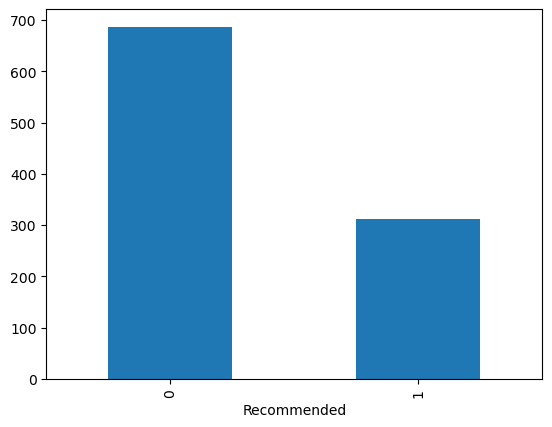

In [33]:
df['Recommended'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

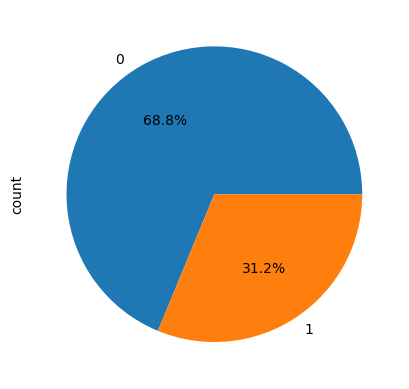

In [34]:
df['Recommended'].value_counts().plot(kind='pie', autopct="%0.1f%%")

In [35]:
for col in ["Type_of_Traveller", "Seat_Type", "Recommended"]:
    print(f"\n{col}:\n", df[col].value_counts())


Type_of_Traveller:
 Type_of_Traveller
Couple Leisure    338
Solo Leisure      323
Business          178
Family Leisure    159
Unknown             1
Name: count, dtype: int64

Seat_Type:
 Seat_Type
Economy Class      550
Business Class     345
Premium Economy     86
First Class         18
Name: count, dtype: int64

Recommended:
 Recommended
0    687
1    312
Name: count, dtype: int64


<Axes: ylabel='count'>

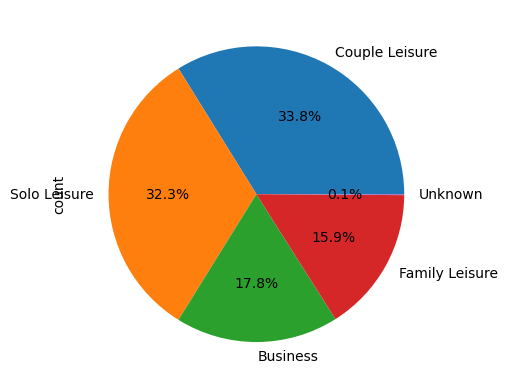

In [36]:
df['Type_of_Traveller'].value_counts().plot(kind='pie', autopct="%0.1f%%")

<Axes: xlabel='Type_of_Traveller'>

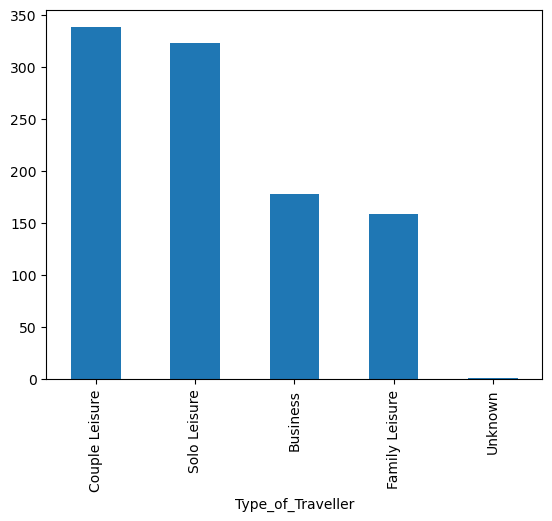

In [37]:
df['Type_of_Traveller'].value_counts().plot(kind='bar')

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

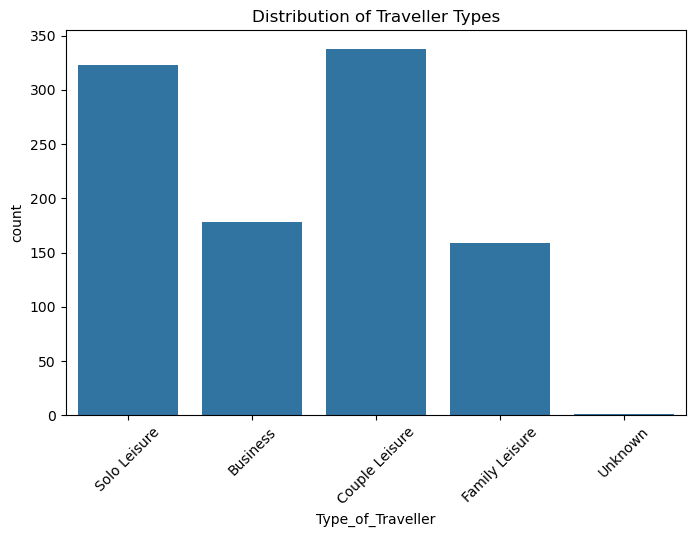

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Type_of_Traveller'])
plt.title('Distribution of Traveller Types')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aabhas\AppData\Local\Temp\ipykernel_19432\15154456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Seat_Type'], palette='Set2')


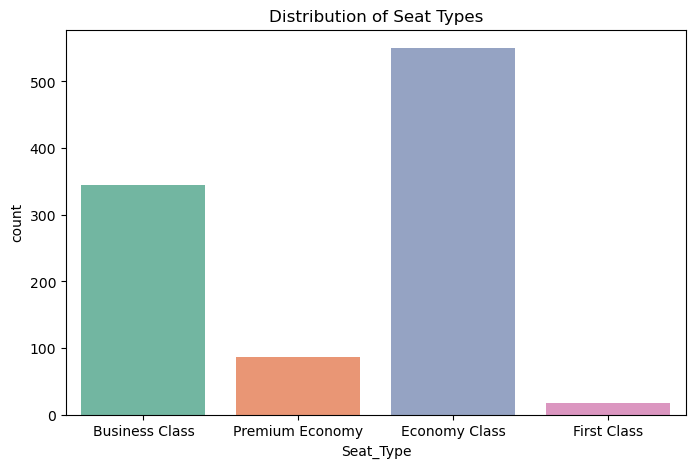

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Seat_Type'], palette='Set2')
plt.title('Distribution of Seat Types')
plt.show()


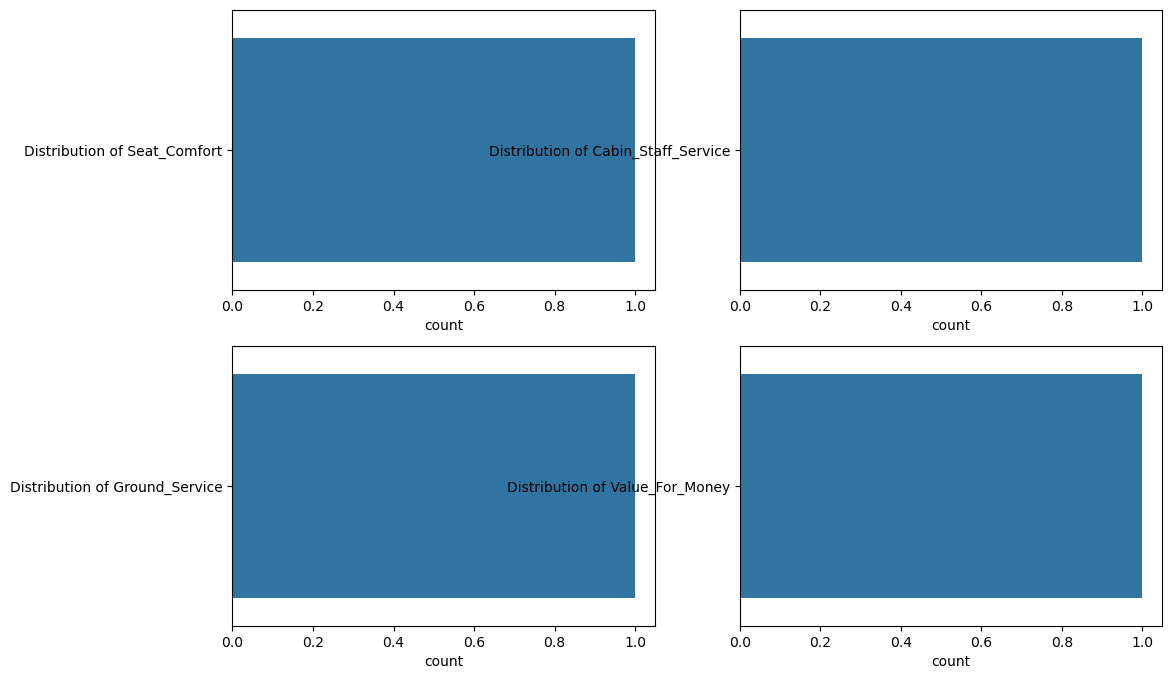

In [41]:
rating_cols = ['Seat_Comfort','Cabin_Staff_Service','Ground_Service','Value_For_Money']
plt.figure(figsize=(12,8))
for i,col in enumerate(rating_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(f"Distribution of {col}")
plt.show()

In [42]:
df.head()

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating
0,"""disagreeable flight attendant""",2025-03-19,Solo Leisure,Business Class,Cape Town to London,2025-03-01,5,2,4,4,1,7
1,"""flight was delayed nearly 1 hour""",2025-03-16,Business,Business Class,London to Geneva,2024-12-01,1,1,1,1,0,2
2,"""full of attitude to me""",2025-03-16,Business,Premium Economy,London to New York,2025-01-01,1,1,5,1,0,4
3,"""service was outrageous""",2025-03-16,Business,Business Class,Chambery to London,2025-01-01,1,1,1,1,0,2
4,"""managed to get everything right""",2025-03-07,Business,Premium Economy,Gatwick to Antigua,2025-03-01,5,5,5,5,1,10


<Axes: xlabel='Seat_Comfort'>

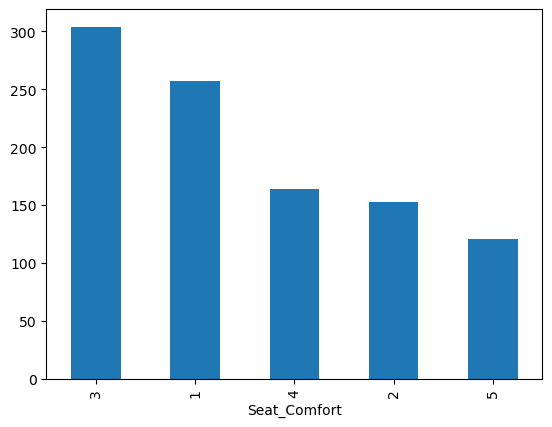

In [43]:
df['Seat_Comfort'].value_counts().plot(kind='bar')

In [44]:
recommendation_rate = df.groupby("overall_rating")['Recommended'].mean()*100

In [45]:
recommendation_rate

overall_rating
2       0.000000
3       0.675676
4       1.010101
5      10.236220
6      40.229885
7      73.611111
8      96.511628
9      96.511628
10    100.000000
Name: Recommended, dtype: float64

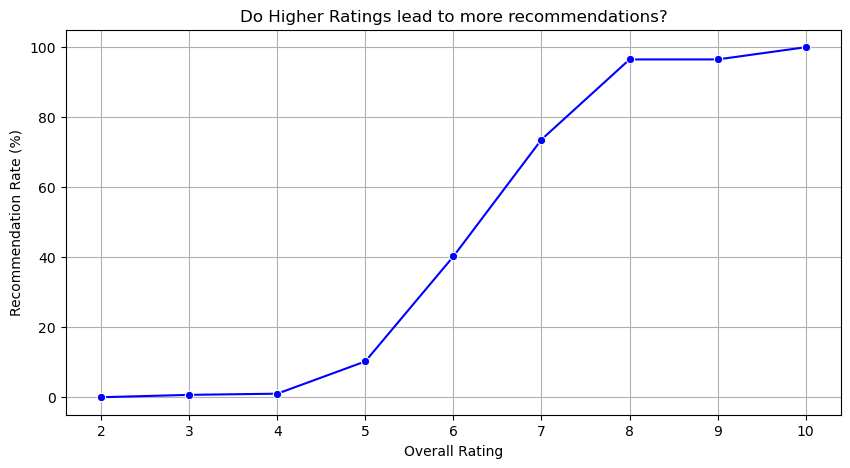

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(x=recommendation_rate.index, y=recommendation_rate.values,marker='o',linestyle='-',color='b')
plt.xlabel("Overall Rating")
plt.ylabel('Recommendation Rate (%)')
plt.title("Do Higher Ratings lead to more recommendations?")
plt.grid()
plt.show()

C:\Users\Aabhas\AppData\Local\Temp\ipykernel_19432\1210255006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seat_Type',y='overall_rating',data=df_filtered,palette='coolwarm')


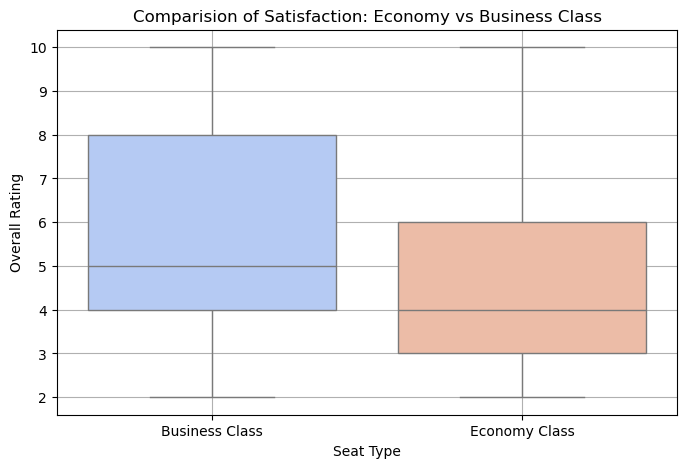

Seat_Type
Business Class    5.582609
Economy Class     4.692727
Name: overall_rating, dtype: float64

In [47]:
df_filtered = df[df['Seat_Type'].isin(['Economy Class','Business Class'])]

plt.figure(figsize=(8,5))
sns.boxplot(x='Seat_Type',y='overall_rating',data=df_filtered,palette='coolwarm')
plt.xlabel('Seat Type')
plt.ylabel('Overall Rating')
plt.title("Comparision of Satisfaction: Economy vs Business Class")
plt.grid()
plt.show()

avg_ratings = df_filtered.groupby('Seat_Type')['overall_rating'].mean()
avg_ratings

In [48]:
df.groupby('Seat_Type',observed=False)[['overall_rating']].describe()

overall_rating                                              
                         count      mean       std  min  25%  50%  75%   max
Seat_Type                                                                   
Business Class           345.0  5.582609  2.423178  2.0  4.0  5.0  8.0  10.0
Economy Class            550.0  4.692727  2.313763  2.0  3.0  4.0  6.0  10.0
First Class               18.0  6.500000  2.431412  2.0  5.0  6.0  9.0  10.0
Premium Economy           86.0  5.360465  2.330932  2.0  4.0  5.0  7.0  10.0

### Here we can clearly see that the people who travelled the business class had a greater level of satisfaction compared to people who traveled by Economy Class.

In [49]:
test['Route'].value_counts()

Route
Vancouver to London                      12
London to Hong Kong                       8
San Francisco to London                   8
Johannesburg to London                    7
Singapore to London                       7
                                         ..
Nairobi to London                         1
Berlin to London Heathrow                 1
London Heathrow to Abuja Nigeria          1
Hyderabad to San Francisco via London     1
Toulouse to London                        1
Name: count, Length: 646, dtype: int64

In [50]:
df['Route'].str.contains(' to ', na=False).value_counts()

Route
True     993
False      6
Name: count, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review_Title         999 non-null    object        
 1   Review_Date          795 non-null    datetime64[ns]
 2   Type_of_Traveller    999 non-null    object        
 3   Seat_Type            999 non-null    object        
 4   Route                999 non-null    object        
 5   Date_Flown           999 non-null    datetime64[ns]
 6   Seat_Comfort         999 non-null    int64         
 7   Cabin_Staff_Service  999 non-null    int64         
 8   Ground_Service       999 non-null    int64         
 9   Value_For_Money      999 non-null    int64         
 10  Recommended          999 non-null    int64         
 11  overall_rating       999 non-null    int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory usage: 133.8+ KB


In [52]:
df = df[df['Route'].str.contains(' to ',na=False)]

In [53]:
df.head(2)

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating
0,"""disagreeable flight attendant""",2025-03-19,Solo Leisure,Business Class,Cape Town to London,2025-03-01,5,2,4,4,1,7
1,"""flight was delayed nearly 1 hour""",2025-03-16,Business,Business Class,London to Geneva,2024-12-01,1,1,1,1,0,2


In [54]:
df.groupby('Type_of_Traveller',observed=False)['overall_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Type_of_Traveller,,,,,,,,
Business,178.0,4.544944,2.061403,2.0,3.0,4.0,5.0,10.0
Couple Leisure,336.0,5.211310,2.334681,2.0,3.0,5.0,7.0,10.0
Family Leisure,156.0,4.692308,2.413979,2.0,3.0,4.0,7.0,10.0
Solo Leisure,322.0,5.487578,2.545811,2.0,3.0,5.0,8.0,10.0
Unknown,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0


<Axes: xlabel='Type_of_Traveller'>

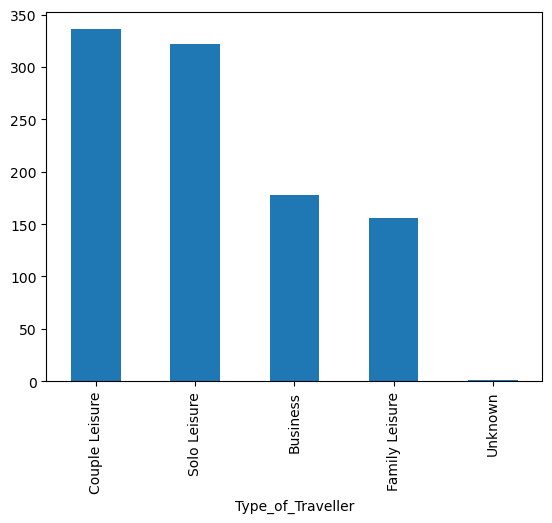

In [55]:
df['Type_of_Traveller'].value_counts().plot(kind='bar')

In [56]:
df.head(2)

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating
0,"""disagreeable flight attendant""",2025-03-19,Solo Leisure,Business Class,Cape Town to London,2025-03-01,5,2,4,4,1,7
1,"""flight was delayed nearly 1 hour""",2025-03-16,Business,Business Class,London to Geneva,2024-12-01,1,1,1,1,0,2


In [57]:
pd.crosstab(df['Type_of_Traveller'],df['Date_Flown'],normalize='columns')*100

Date_Flown,2019-04-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,...,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01,2025-03-01
Type_of_Traveller,,,,,,,,,,,,,,,,,,,,,
Business,0.0,0.0,0.0,12.500,25.000000,25.806452,8.333333,22.580645,22.222222,21.052632,...,16.666667,9.090909,25.000000,15.384615,20.000000,9.090909,25.0,42.857143,0.0,50.0
Couple Leisure,100.0,0.0,50.0,59.375,38.888889,25.806452,25.000000,32.258065,44.444444,36.842105,...,33.333333,36.363636,4.166667,38.461538,26.666667,9.090909,25.0,14.285714,60.0,0.0
Family Leisure,0.0,50.0,50.0,3.125,8.333333,16.129032,16.666667,12.903226,0.000000,5.263158,...,0.000000,27.272727,29.166667,15.384615,6.666667,45.454545,12.5,28.571429,0.0,0.0
Solo Leisure,0.0,50.0,0.0,25.000,27.777778,32.258065,50.000000,32.258065,33.333333,36.842105,...,50.000000,27.272727,41.666667,30.769231,46.666667,36.363636,37.5,14.285714,40.0,50.0
Unknown,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


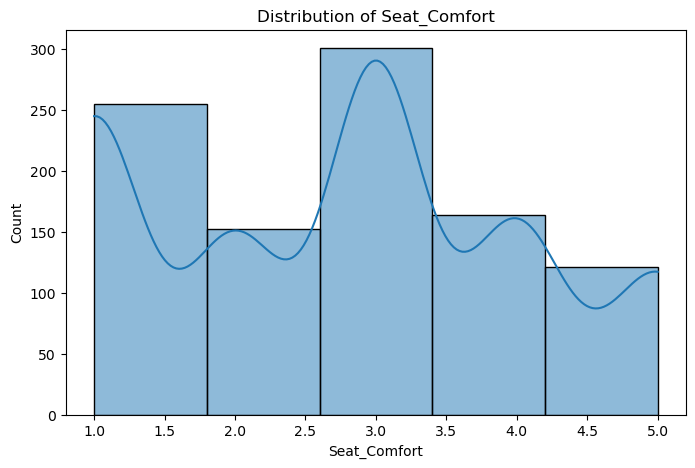

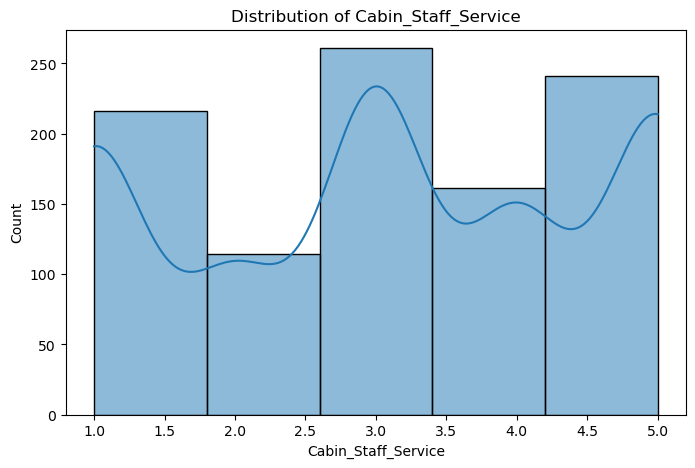

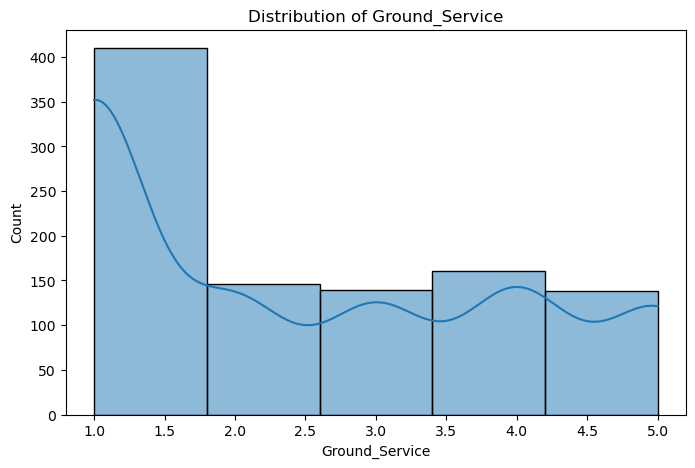

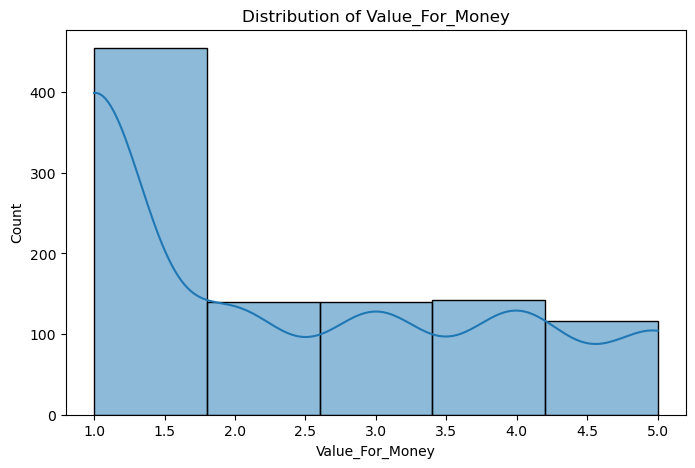

In [58]:
cols = ['Seat_Comfort','Cabin_Staff_Service','Ground_Service','Value_For_Money']
for col in cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col],bins=5, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<Axes: xlabel='Recommended', ylabel='count'>

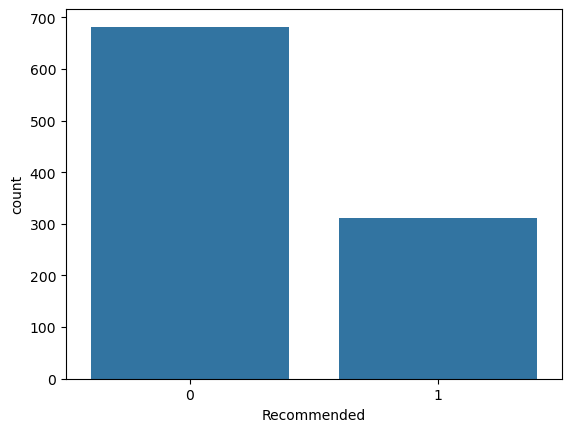

In [59]:
sns.countplot(x = df['Recommended'])

<Axes: ylabel='count'>

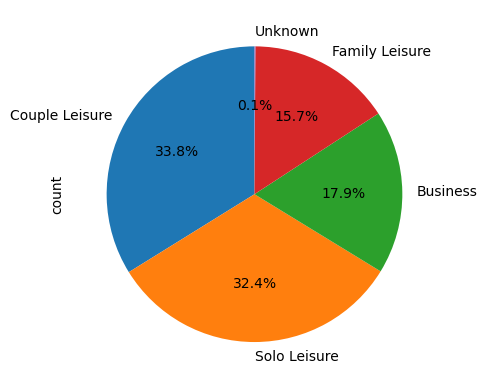

In [60]:
df['Type_of_Traveller'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

<Axes: xlabel='Recommended', ylabel='overall_rating'>

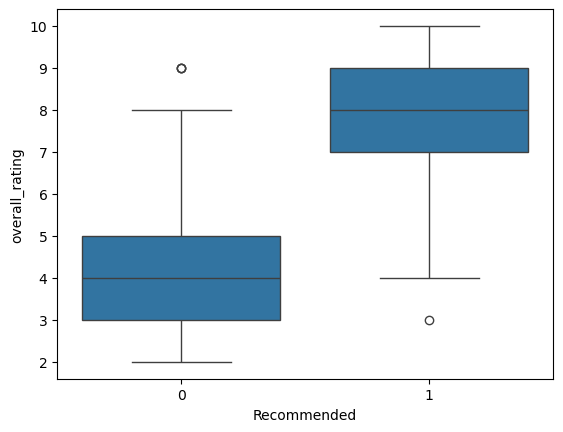

In [61]:
sns.boxplot(x='Recommended',y='overall_rating',data=df)

<Axes: xlabel='Seat_Type', ylabel='Value_For_Money'>

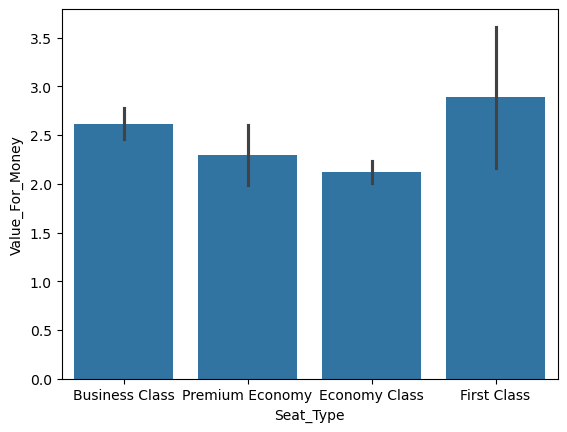

In [62]:
sns.barplot(x='Seat_Type', y='Value_For_Money', data=df)


<Axes: xlabel='Seat_Type', ylabel='overall_rating'>

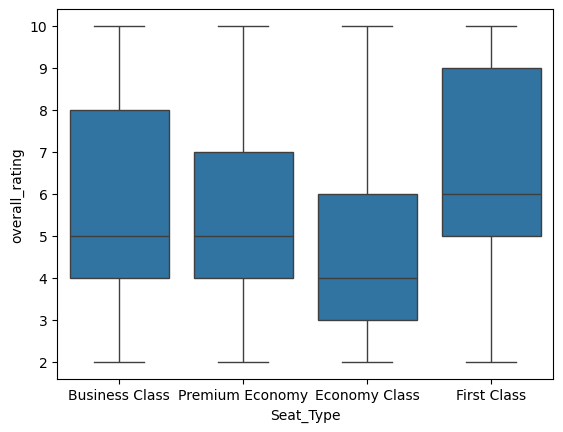

In [63]:
sns.boxplot(x='Seat_Type', y='overall_rating', data=df)

<Axes: >

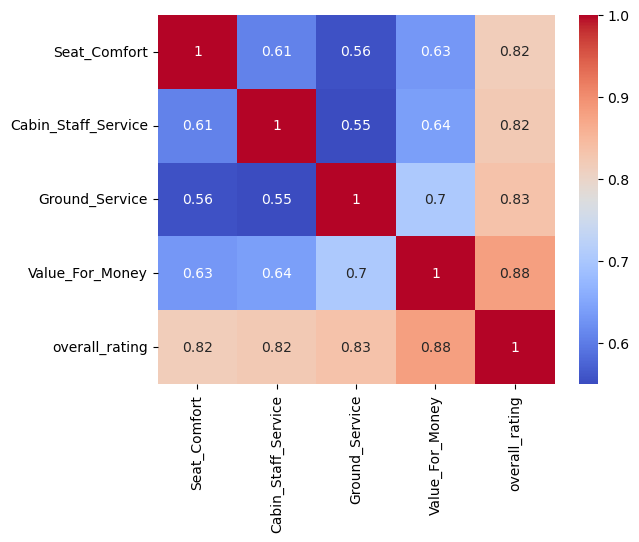

In [64]:
sns.heatmap(df[['Seat_Comfort', 'Cabin_Staff_Service', 'Ground_Service', 'Value_For_Money', 'overall_rating']].corr(), annot=True, cmap='coolwarm')


In [65]:
df[['Departure_City','Arrival_City']] = df['Route'].str.split(' to ',expand=True).drop(2,axis=1)

<Axes: xlabel='Departure_City'>

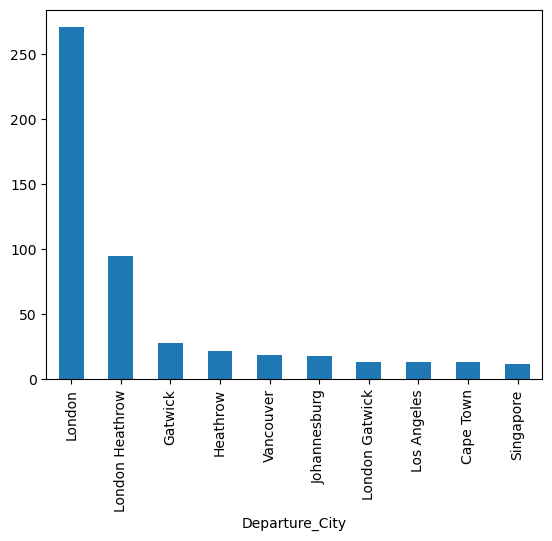

In [66]:
df['Departure_City'].value_counts().nlargest(10).plot(kind='bar')

In [67]:
cross = pd.crosstab(df['Seat_Type'],df['Recommended'])

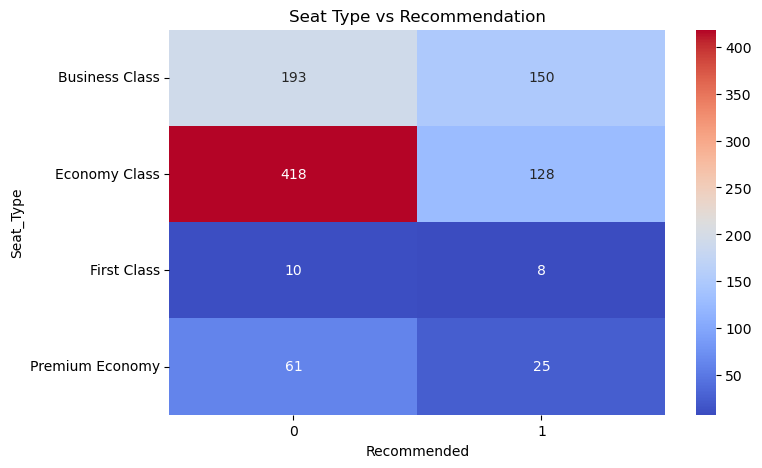

In [68]:
plt.figure(figsize=(8,5))
sns.heatmap(cross, annot=True, fmt='d', cmap='coolwarm')
plt.title('Seat Type vs Recommendation')
plt.show()

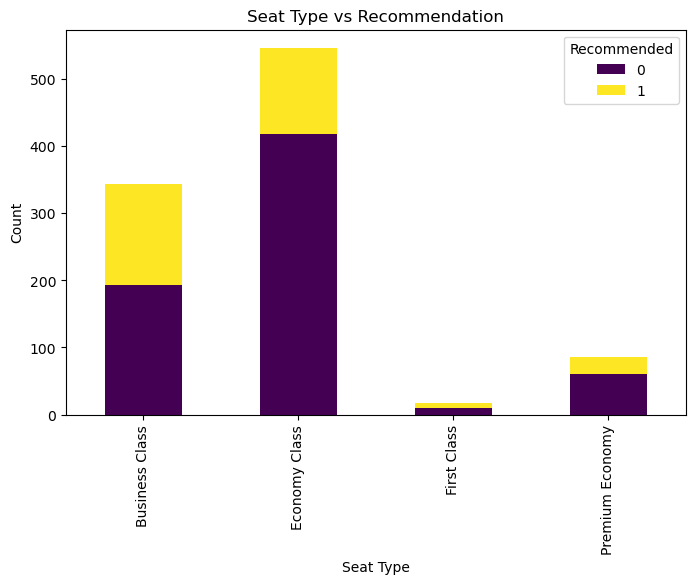

In [69]:
cross.plot(kind='bar', stacked=True,figsize=(8,5), colormap='viridis')
plt.title('Seat Type vs Recommendation')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.legend(title='Recommended')
plt.show()

In [70]:
df.groupby('Departure_City',observed=False)['Recommended'].describe().sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Departure_City,,,,,,,,
London,271.0,0.317343,0.466303,0.0,0.0,0.0,1.00,1.0
London Heathrow,95.0,0.357895,0.481924,0.0,0.0,0.0,1.00,1.0
Gatwick,28.0,0.321429,0.475595,0.0,0.0,0.0,1.00,1.0
Heathrow,22.0,0.272727,0.455842,0.0,0.0,0.0,0.75,1.0
Vancouver,19.0,0.526316,0.512989,0.0,0.0,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
Washington DC,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
Zagreb,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
Washington Dulles,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0


In [71]:
df.drop('Route', axis=1,inplace=True)

In [72]:
df['Review_Type'] = df['overall_rating'].apply(lambda x: 'Positive' if x>=7 else 'Negative')

In [73]:
df.head(1)

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating,Departure_City,Arrival_City,Review_Type
0,"""disagreeable flight attendant""",2025-03-19,Solo Leisure,Business Class,2025-03-01,5,2,4,4,1,7,Cape Town,London,Positive


### Q. Do higher-rated reviews lead to more recommendation?

In [74]:
recommendation_rate = df.groupby('overall_rating',observed=False)['Recommended'].mean()*100

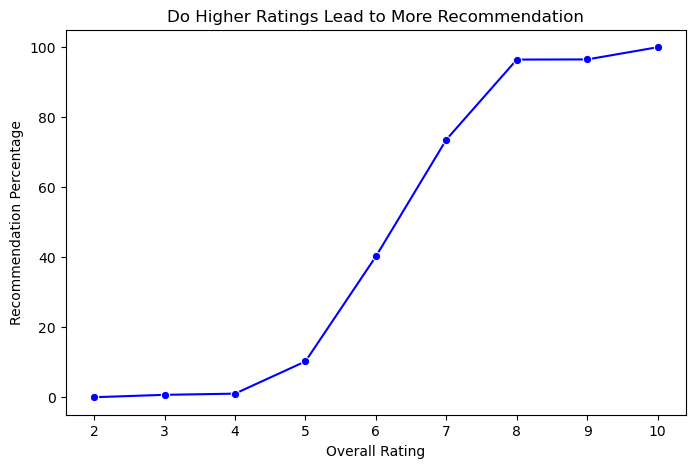

<Figure size 640x480 with 0 Axes>

In [75]:
plt.figure(figsize=(8,5))
sns.lineplot(x=recommendation_rate.index,y=recommendation_rate.values,marker='o',color='b')
plt.xlabel('Overall Rating')
plt.ylabel('Recommendation Percentage')
plt.title('Do Higher Ratings Lead to More Recommendation')
plt.show()
plt.savefig('rate.png')

### Are economy class passengers more dissatisfied than business class?

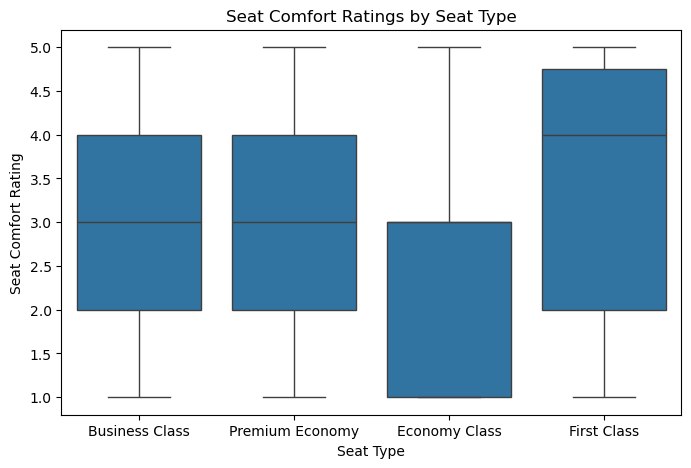

In [76]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Seat_Type'],y=df['Seat_Comfort'])
plt.xlabel("Seat Type")
plt.ylabel("Seat Comfort Rating")
plt.title("Seat Comfort Ratings by Seat Type")
plt.show()

In [77]:
df.head()

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating,Departure_City,Arrival_City,Review_Type
0,"""disagreeable flight attendant""",2025-03-19,Solo Leisure,Business Class,2025-03-01,5,2,4,4,1,7,Cape Town,London,Positive
1,"""flight was delayed nearly 1 hour""",2025-03-16,Business,Business Class,2024-12-01,1,1,1,1,0,2,London,Geneva,Negative
2,"""full of attitude to me""",2025-03-16,Business,Premium Economy,2025-01-01,1,1,5,1,0,4,London,New York,Negative
3,"""service was outrageous""",2025-03-16,Business,Business Class,2025-01-01,1,1,1,1,0,2,Chambery,London,Negative
4,"""managed to get everything right""",2025-03-07,Business,Premium Economy,2025-03-01,5,5,5,5,1,10,Gatwick,Antigua,Positive


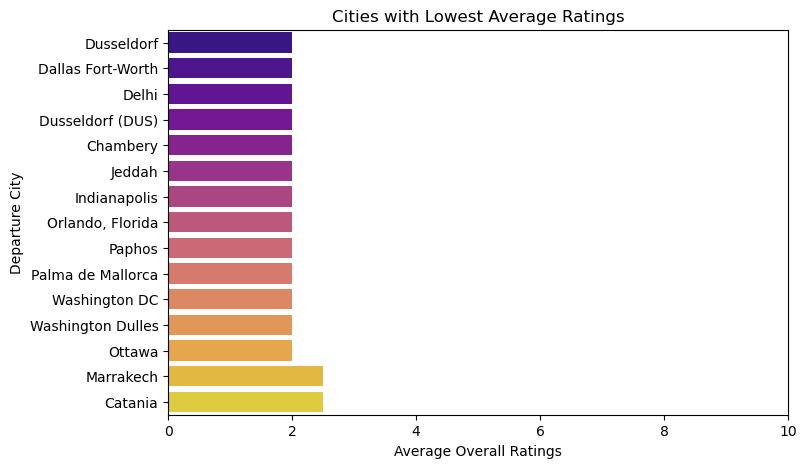

<Figure size 640x480 with 0 Axes>

In [78]:
city_ratings = df.groupby('Departure_City',observed=False)['overall_rating'].mean().sort_values().head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=city_ratings.values, y=city_ratings.index, hue=city_ratings.index, legend=False, palette='plasma')
plt.xlabel('Average Overall Ratings')
plt.ylabel('Departure City')
plt.title('Cities with Lowest Average Ratings')
plt.xlim(0,10)
plt.show()
plt.savefig('depart.png')

In [79]:
city_ratings

Departure_City
Dusseldorf           2.0
Dallas Fort-Worth    2.0
Delhi                2.0
Dusseldorf (DUS)     2.0
Chambery             2.0
Jeddah               2.0
Indianapolis         2.0
Orlando, Florida     2.0
Paphos               2.0
Palma de Mallorca    2.0
Washington DC        2.0
Washington Dulles    2.0
Ottawa               2.0
Marrakech            2.5
Catania              2.5
Name: overall_rating, dtype: float64

In [80]:
a = df[df['Seat_Type'] == 'Economy Class']
b = df[df['Seat_Type'] == 'Business Class']
c = pd.concat([a,b])

In [81]:
cross = pd.crosstab(c['Seat_Type'],c['overall_rating'])
cross

overall_rating,2,3,4,5,6,7,8,9,10
Seat_Type,,,,,,,,,
Business Class,43,42,45,43,41,33,42,41,13
Economy Class,98,95,128,71,33,30,34,34,23


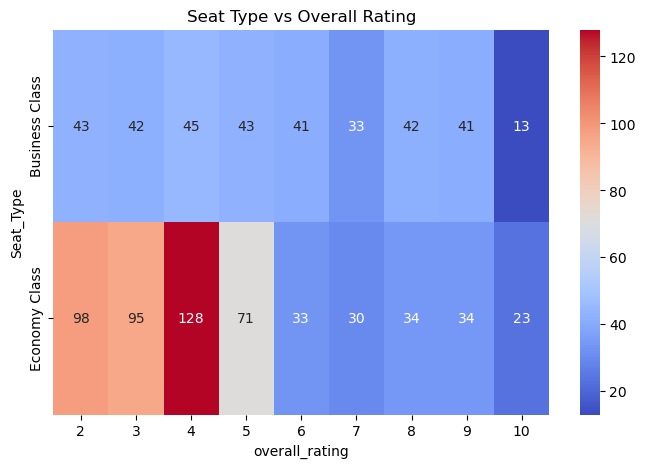

<Figure size 640x480 with 0 Axes>

In [82]:
plt.figure(figsize=(8,5))
sns.heatmap(cross, annot=True, fmt='d', cmap='coolwarm')
plt.title('Seat Type vs Overall Rating')
plt.show()
plt.savefig('eco.png')

In [83]:
!pip install nltk vaderSentiment wordcloud

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [84]:
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [85]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aabhas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aabhas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aabhas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [87]:
print(nltk.data.find('tokenizers/punkt'))

C:\Users\Aabhas\AppData\Roaming\nltk_data\tokenizers\punkt


## Text Preprocessing

In [88]:
def clean_text(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = " ".join([word for word in word_tokenize(text) if word not in stop_words])
    return text

df['cleaned_review'] = df['Review_Title'].astype(str).apply(clean_text)
df.head()

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating,Departure_City,Arrival_City,Review_Type,cleaned_review
0,"""disagreeable flight attendant""",2025-03-19,Solo Leisure,Business Class,2025-03-01,5,2,4,4,1,7,Cape Town,London,Positive,disagreeable flight attendant
1,"""flight was delayed nearly 1 hour""",2025-03-16,Business,Business Class,2024-12-01,1,1,1,1,0,2,London,Geneva,Negative,flight delayed nearly 1 hour
2,"""full of attitude to me""",2025-03-16,Business,Premium Economy,2025-01-01,1,1,5,1,0,4,London,New York,Negative,full attitude
3,"""service was outrageous""",2025-03-16,Business,Business Class,2025-01-01,1,1,1,1,0,2,Chambery,London,Negative,service outrageous
4,"""managed to get everything right""",2025-03-07,Business,Premium Economy,2025-03-01,5,5,5,5,1,10,Gatwick,Antigua,Positive,managed get everything right


### Sentiment Analysis

In [89]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)
df.head()

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating,Departure_City,Arrival_City,Review_Type,cleaned_review,sentiment
0,"""disagreeable flight attendant""",2025-03-19,Solo Leisure,Business Class,2025-03-01,5,2,4,4,1,7,Cape Town,London,Positive,disagreeable flight attendant,Negative
1,"""flight was delayed nearly 1 hour""",2025-03-16,Business,Business Class,2024-12-01,1,1,1,1,0,2,London,Geneva,Negative,flight delayed nearly 1 hour,Negative
2,"""full of attitude to me""",2025-03-16,Business,Premium Economy,2025-01-01,1,1,5,1,0,4,London,New York,Negative,full attitude,Neutral
3,"""service was outrageous""",2025-03-16,Business,Business Class,2025-01-01,1,1,1,1,0,2,Chambery,London,Negative,service outrageous,Negative
4,"""managed to get everything right""",2025-03-07,Business,Premium Economy,2025-03-01,5,5,5,5,1,10,Gatwick,Antigua,Positive,managed get everything right,Neutral


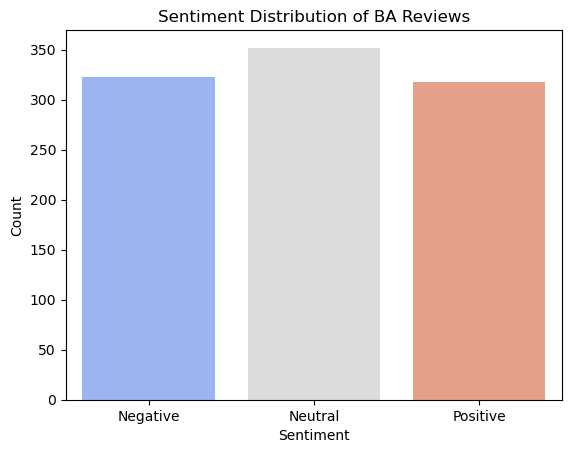

In [90]:
sns.countplot(x=df['sentiment'], palette='coolwarm', hue=df['sentiment'])
plt.title('Sentiment Distribution of BA Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

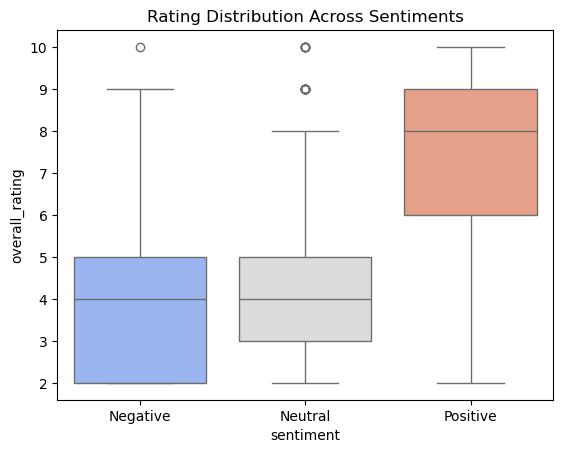

In [91]:
sns.boxplot(x=df['sentiment'], y=df['overall_rating'],palette='coolwarm',hue=df['sentiment'])
plt.title('Rating Distribution Across Sentiments')
plt.show()

In [92]:
df.head()

,Review_Title,Review_Date,Type_of_Traveller,Seat_Type,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,overall_rating,Departure_City,Arrival_City,Review_Type,cleaned_review,sentiment
0,"""disagreeable flight attendant""",2025-03-19,Solo Leisure,Business Class,2025-03-01,5,2,4,4,1,7,Cape Town,London,Positive,disagreeable flight attendant,Negative
1,"""flight was delayed nearly 1 hour""",2025-03-16,Business,Business Class,2024-12-01,1,1,1,1,0,2,London,Geneva,Negative,flight delayed nearly 1 hour,Negative
2,"""full of attitude to me""",2025-03-16,Business,Premium Economy,2025-01-01,1,1,5,1,0,4,London,New York,Negative,full attitude,Neutral
3,"""service was outrageous""",2025-03-16,Business,Business Class,2025-01-01,1,1,1,1,0,2,Chambery,London,Negative,service outrageous,Negative
4,"""managed to get everything right""",2025-03-07,Business,Premium Economy,2025-03-01,5,5,5,5,1,10,Gatwick,Antigua,Positive,managed get everything right,Neutral


In [95]:
df.drop('Review_Type',axis=1,inplace=True)